In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [4]:
df=pd.read_csv('/content/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [7]:
df.describe(include=[int,float])

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


<ipython-input-8-61ae9f4eccf5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df.corr()


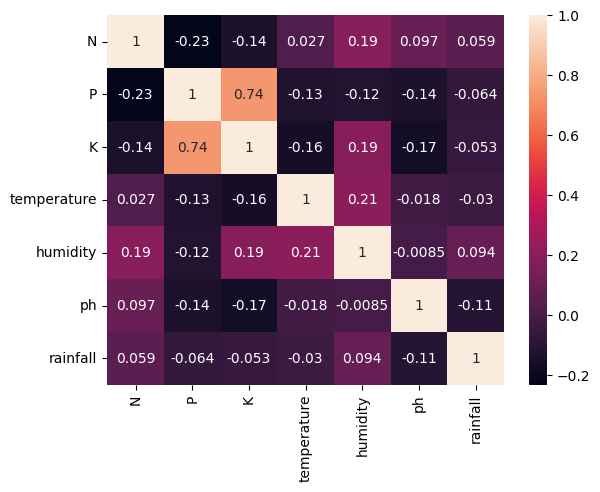

In [8]:
cor=df.corr()
sns.heatmap(cor,annot=True)
plt.show()

In [10]:
df.columns=['Nitrogen','Phosphorus','Potassium','Temperature','Humidity','Ph','Rainfall','Crop']

In [11]:
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,Ph,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


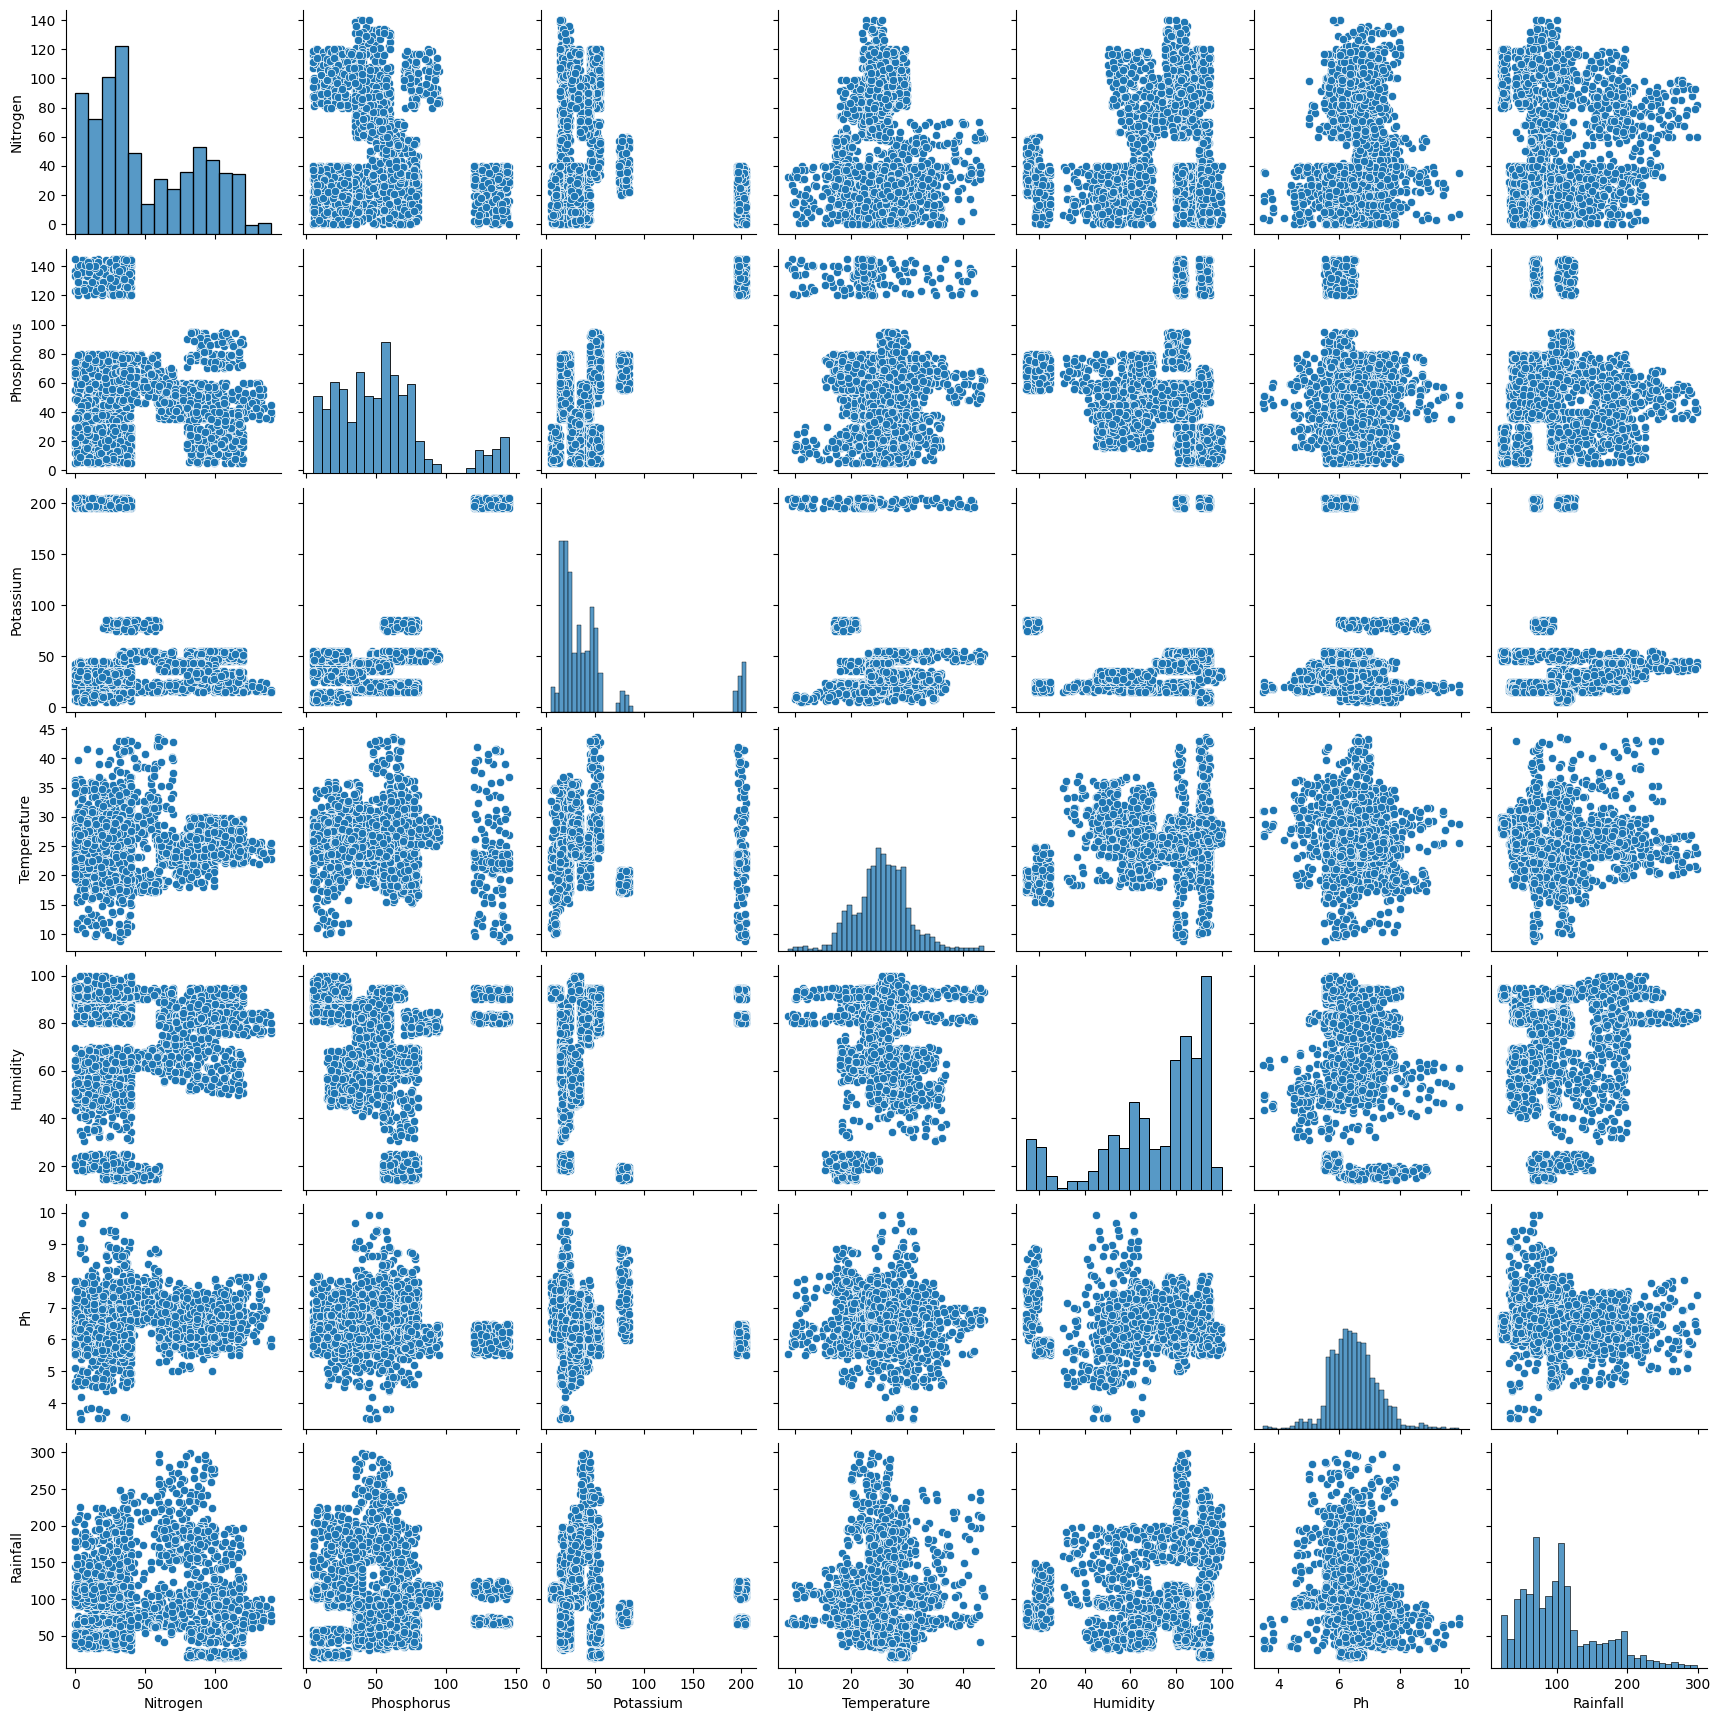

In [14]:
sns.pairplot(df)
plt.show()

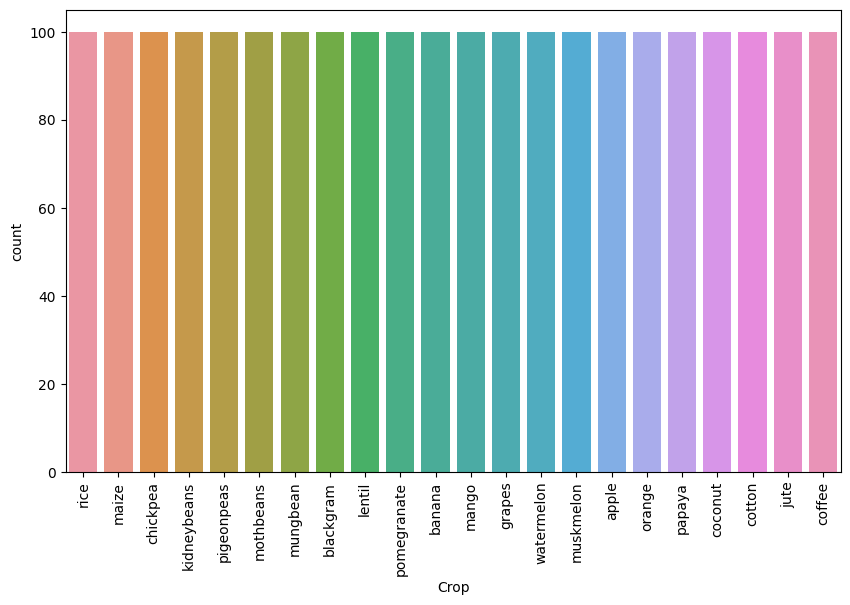

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x='Crop',data=df)
plt.xticks(rotation=90)
plt.show()

In [27]:
# spliting the data
x=df.drop('Crop',axis=1)
y=df['Crop']
scale=StandardScaler()
x=pd.DataFrame(scale.fit_transform(x),columns=df.columns[:-1])

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)

In [65]:
# Model Building
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

RandomForestClassifier()

In [66]:
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9954545454545455


In [67]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [68]:
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9954545454545455


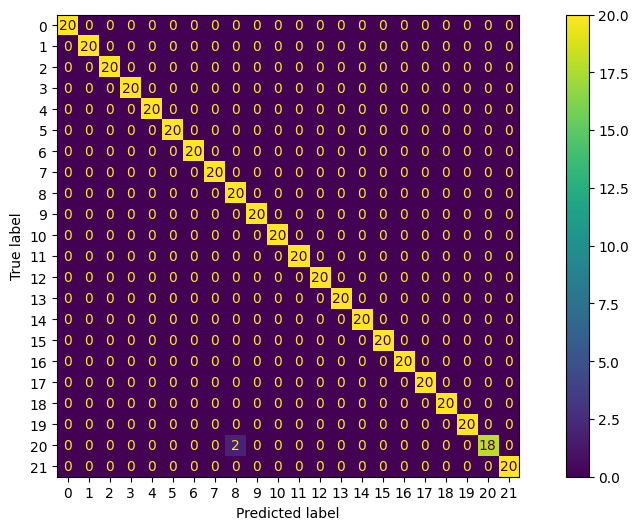

In [79]:
conf=confusion_matrix(y_test,y_pred,labels=model.classes_)
disp=ConfusionMatrixDisplay(conf,display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(12, 6))
disp.plot(ax=ax)
plt.show()

In [80]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))